In [1]:
!pip install NLTK

In [2]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load the dataset
df = pd.read_csv('data_bersih.csv')
df

,title,label,label_score
0,masuk radar pilwalkot medan menantu jokowi tem...,non-clickbait,0
1,malaysia sudut ri isu kabut asap invasi babi,non-clickbait,0
2,viral driver ojol bekas pesan makan pakai sepeda,clickbait,1
3,kemensos salur rp m korban rusuh sosial papua,non-clickbait,0
4,kait mayat bayi enas tangerang pria tangkap po...,non-clickbait,0
...,...,...,...
14995,tolak ruu tanah ribu tani gelar aksi istanadpr...,non-clickbait,0
14996,niat momong program hamil fedi nuril pengin ya...,clickbait,1
14997,edar isu internet papua blokir telkom warga pe...,non-clickbait,0
14998,txt comeback soobin aku gatal pamer spoiler,clickbait,1


In [4]:
print(df.isnull().sum())

title          0
label          0
label_score    0
dtype: int64


In [5]:
# Pisahkan atribut dan label
X = df['title']
y = df['label_score']

In [6]:
from sklearn.preprocessing import LabelEncoder
# Mengubah label menjadi angka
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
# membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# mengubah fitur menjadi vektor tf-idf
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

best_score = 0
best_k = 0
for k in range(1, 12, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k
    print(f"k = {k}, Accuracy = {score}")

print(f"Best k: {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Membuat dan melatih model KNN dengan k terbaik
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

# Evaluate model
y_pred = knn.predict(X_test)

k = 1, Accuracy = 0.65
k = 3, Accuracy = 0.685
k = 5, Accuracy = 0.683
k = 7, Accuracy = 0.7043333333333334
k = 9, Accuracy = 0.7146666666666667
k = 11, Accuracy = 0.7153333333333334
Best k: 11


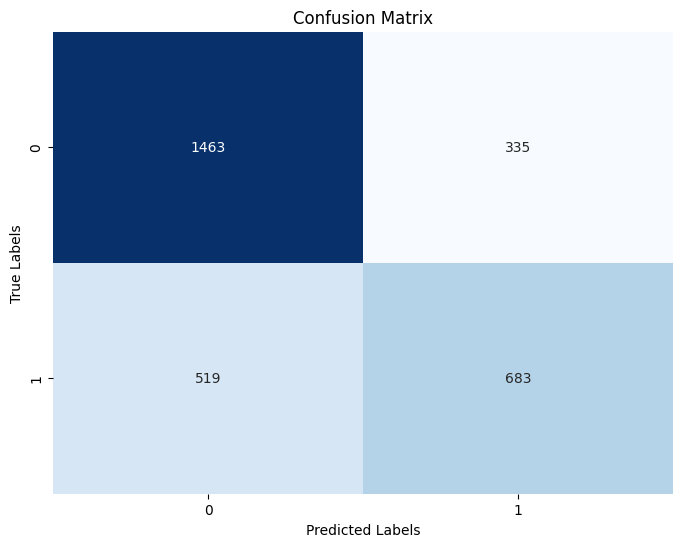

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Create classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1798
           1       0.67      0.57      0.62      1202

    accuracy                           0.72      3000
   macro avg       0.70      0.69      0.69      3000
weighted avg       0.71      0.72      0.71      3000

